In [40]:
import numpy as np

In [1]:
import tensorflow as tf

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(x_train,y_train),(x_test, y_test)= mnist.load_data()

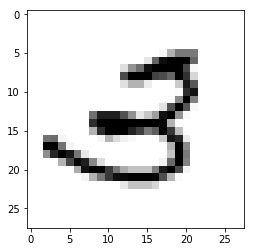

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3941],cmap=plt.cm.binary) # cambiando el numero vemos a la imagen que corresponde
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
print(y_train[3941])

3


In [8]:
print(x_train.ndim) # dimensiones del array 

3


In [9]:
print(x_train.dtype)# tipo de datos

uint8


In [10]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train= x_train/255
x_test= x_test/255

In [11]:
x_train= x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)

In [12]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [13]:
from keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_train= to_categorical(y_train,num_classes=10) # hace la matriz one-hot encoding para softmax
y_test= to_categorical(y_test,num_classes=10)

In [16]:
y_train.shape

(60000, 10)

In [17]:
print(y_train[3941]) # para ver como quedo el label del numero image  3941 es 3

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [27]:
#from tensorflow.keras import backend
graph= tf.Graph()
print(type(graph))
tf.keras.backend.clear_session()
print(tf.keras.__version__) 
print(tf.__version__)

from tensorflow.keras import layers



model = tf.keras.Sequential() 
#from tensorflow.keras.models import Sequential  # toco traer de esta forma el modelo de keras. invocando tensorflow
#from keras.layers.core import Dense, Activation
#from keras.layers.core import Dense, Activation # directo de keras se traen las capas hidden densas y la activacion
#model= Sequential()
model.add(layers.Dense(10,activation='sigmoid',input_shape=(784,))) # capa hidden de salida 10 entrada 784 
model.add(layers.Dense(10,activation='softmax'))
# otra forma de hacer las capas es:
#model = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(28, 28)),
#  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(10, activation='softmax')
#])


<class 'tensorflow.python.framework.ops.Graph'>
2.2.4-tf
2.0.0-alpha0


In [29]:
model.summary() # ver como esta formado el modelo NN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(0.001),metrics=['accuracy']) # se cambia por el optimizador adam y mejora la accuracy
# el optimizador 'sgd' no da buena accuracy
# otra forma de compilar es :
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
 #             metrics=['accuracy'])

In [53]:
model.fit(x_train,y_train,batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 1s 25us/sample - loss: 1.4131 - accuracy: 0.6806
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.7429 - accuracy: 0.8527
Epoch 3/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.5356 - accuracy: 0.8778
Epoch 4/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4372 - accuracy: 0.8922
Epoch 5/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3804 - accuracy: 0.9014


In [54]:
test_loss,test_acc= model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3586 - accuracy: 0.9026


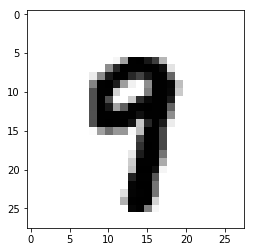

In [65]:

plt.imshow(x_test[7382].reshape(28,28),cmap=plt.cm.binary) # tener en cuenta hacer reshape antes de graficar, el vector esta plano

In [56]:
prediction= model.predict(x_test) # lo hace en todo el vector de test

In [66]:
np.argmax(prediction[7382]) # se elige ina posicion de 0 a 10000

9

In [67]:
print(prediction[7382]) # para ver la salida softmax

[1.0837645e-04 3.0694569e-03 4.8438724e-04 1.5721112e-02 2.3252297e-02
 8.6236363e-03 2.1660175e-04 2.0266945e-02 4.5769266e-03 9.2368025e-01]
